In [3]:
# 导入相应的包
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# K-means里的K值
k = 3

# 随机初始化K个中心点,把结果存储在C
X = np.random.random((200, 2))*10
C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("初始化之后的中心点:")
print(C)

初始化之后的中心点:
[[5. 0.]
 [6. 2.]
 [1. 2.]]


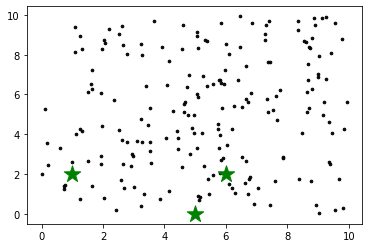

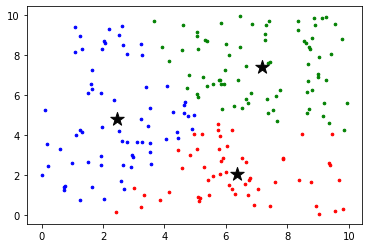

In [4]:
# 把中心点也展示一下
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=300, c='g')

# 存储之前的中心点
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
def dist(a, b, ax=1):
      return np.linalg.norm(a - b, axis=ax)
error = dist(C, C_old, None)

# 循环算法,直到收敛。收敛的条件就是,判断当前的中心点与之前的中心点之间有没有变化,没有变化距离就会变成0,然后抛出异常
while error != 0:
  # Assigning each value to its closest cluster
  for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster
  # 在计算新的中心点之前,先把旧的中心点存下来,以便计算距离
  C_old = deepcopy(C)
  # 计算新的中心点
  for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')